In [29]:
#### 3.2.ImmuneCell_Infiltration_Clean.R
## 1) Loading data
### Papaer：Machine Learning Identifies Stemness Features Associated with Oncogenic Dedifferentiation
### https://gdc.cancer.gov/about-data/publications/PanCanStemness-2018
COAD_Machine_Learning_Stemness.ImmuneCell_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/Machine_Learning_Identifies_Stemness_Features/COAD_Machine_Learning_Stemness.ImmuneCell.cibersort.relative_dataset.rds")
#COAD_Machine_Learning_Stemness.ImmuneCell_dataset$Machine_Learning_Stemness.metadata
COAD_Machine_Learning_StemnessimmuneCell.Absolute <- COAD_Machine_Learning_Stemness.ImmuneCell_dataset$COAD_Machine_Learning_StemnessimmuneCell.Absolute
#### 1.Loading_data_for_signature_analysis.R
## 1)Loading cluster results
Cluster.20200201.V7.Tumor <- readRDS("/data8t_4/JH/MyJobs/NormalCancer_TCGA_V2/Cluster.20200201.V7.Tumor.rds")
cutree.res <- Cluster.20200201.V7.Tumor$cutree.res
dynamicColors <- Cluster.20200201.V7.Tumor$dynamicColors
Cluster.df <- cbind(cutree.res,dynamicColors) 
Cluster.df <- as.data.frame(Cluster.df)
Cluster.df$rownames <- rownames(Cluster.df)
table(Cluster.df$dynamicColors)


     blue     brown turquoise    yellow 
      103        47       135         1 

In [30]:
## 2)clean table Remove duplicated one randomly
table(duplicated(COAD_Machine_Learning_StemnessimmuneCell.Absolute$rownames))
COAD_Machine_Learning_StemnessimmuneCell.Absolute.Unique <- COAD_Machine_Learning_StemnessimmuneCell.Absolute[!duplicated(COAD_Machine_Learning_StemnessimmuneCell.Absolute$rownames),]

## 3)Merge table
MergeTable.Machine.Immune.clean <- dplyr::left_join(Cluster.df, COAD_Machine_Learning_StemnessimmuneCell.Absolute.Unique, by = "rownames")
# Remove yellow one
MergeTable.Machine.Immune.clean <- MergeTable.Machine.Immune.clean[MergeTable.Machine.Immune.clean$dynamicColors != "yellow",]
dim(MergeTable.Machine.Immune.clean)
MergeTable.Machine.Immune.clean <- MergeTable.Machine.Immune.clean[complete.cases(MergeTable.Machine.Immune.clean), ]

MergeTable.Machine.Immune.clean<- MergeTable.Machine.Immune.clean[,-c(1,3)]



FALSE  TRUE 
  501    13 

[1] 285  25


     blue     brown turquoise    yellow 
      103        47       134         0 

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
value,blue,brown,0.0000528625,0.00016,5.3e-05,****,Wilcoxon
value,blue,turquoise,0.0864855824,0.08600,0.086,ns,Wilcoxon
value,brown,turquoise,0.0079940503,0.01600,0.008,**,Wilcoxon


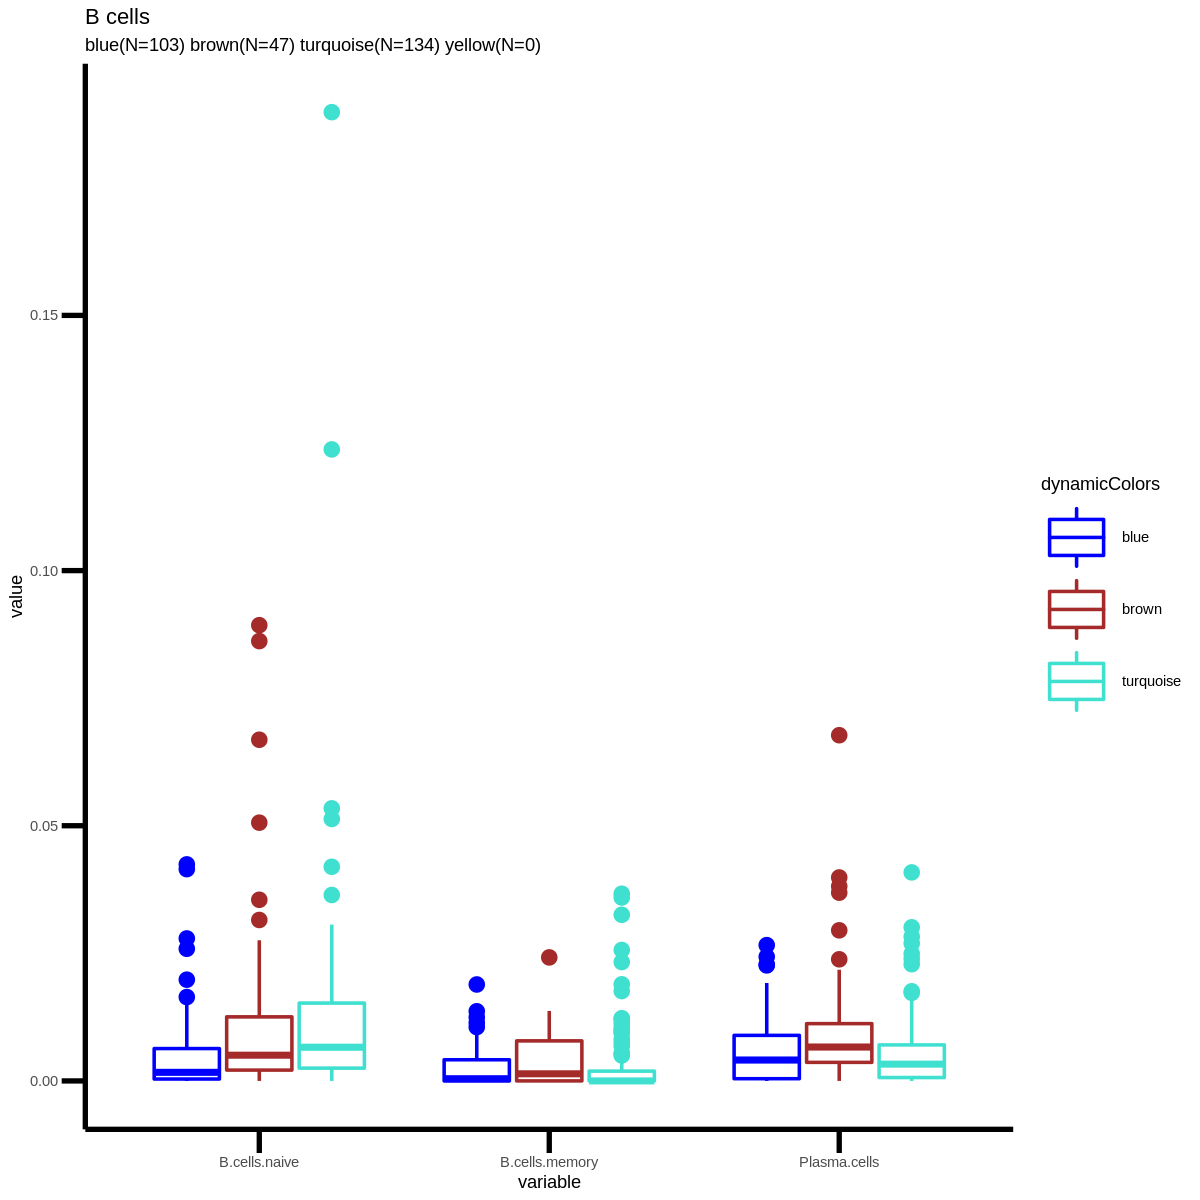

In [37]:
library(reshape2)
library(ggplot2)
## 4) Plotting
# B cells
options(repr.plot.width=10, repr.plot.height=10)
table(MergeTable.Machine.Immune.clean$dynamicColors)
sampleSize <- paste(levels(MergeTable.Machine.Immune.clean$dynamicColors),"(N=",table(MergeTable.Machine.Immune.clean$dynamicColors),")",sep="")
sampleSize <- paste(sampleSize,collapse=" ")
dat.m.Bcell <- melt(MergeTable.Machine.Immune.clean[,c(2:4,1)],id.vars='dynamicColors')
ggplot(dat.m.Bcell) + geom_boxplot(aes(x=variable, y=value, color=dynamicColors),lwd = 1,outlier.size = 4) + 
  scale_color_manual(values= c("blue","brown","turquoise","yellow")) +
  theme_classic()+
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
        axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  labs(title = "B cells",subtitle =sampleSize)

stat <- MergeTable.Machine.Immune.clean[,c(2:4,1)]

ggpubr::compare_means(value ~ dynamicColors,  data = dat.m.Bcell,
                     method = "wilcox.test")

[1] "dynamicColors"                "B.cells.naive"               
 [3] "B.cells.memory"               "Plasma.cells"                
 [5] "T.cells.CD8"                  "T.cells.CD4.naive"           
 [7] "T.cells.CD4.memory.resting"   "T.cells.CD4.memory.activated"
 [9] "T.cells.follicular.helper"    "T.cells.regulatory..Tregs."  
[11] "T.cells.gamma.delta"          "NK.cells.resting"            
[13] "NK.cells.activated"           "Monocytes"                   
[15] "Macrophages.M0"               "Macrophages.M1"              
[17] "Macrophages.M2"               "Dendritic.cells.resting"     
[19] "Dendritic.cells.activated"    "Mast.cells.resting"          
[21] "Mast.cells.activated"         "Eosinophils"                 
[23] "Neutrophils"


     blue     brown turquoise    yellow 
      103        47       134         0 

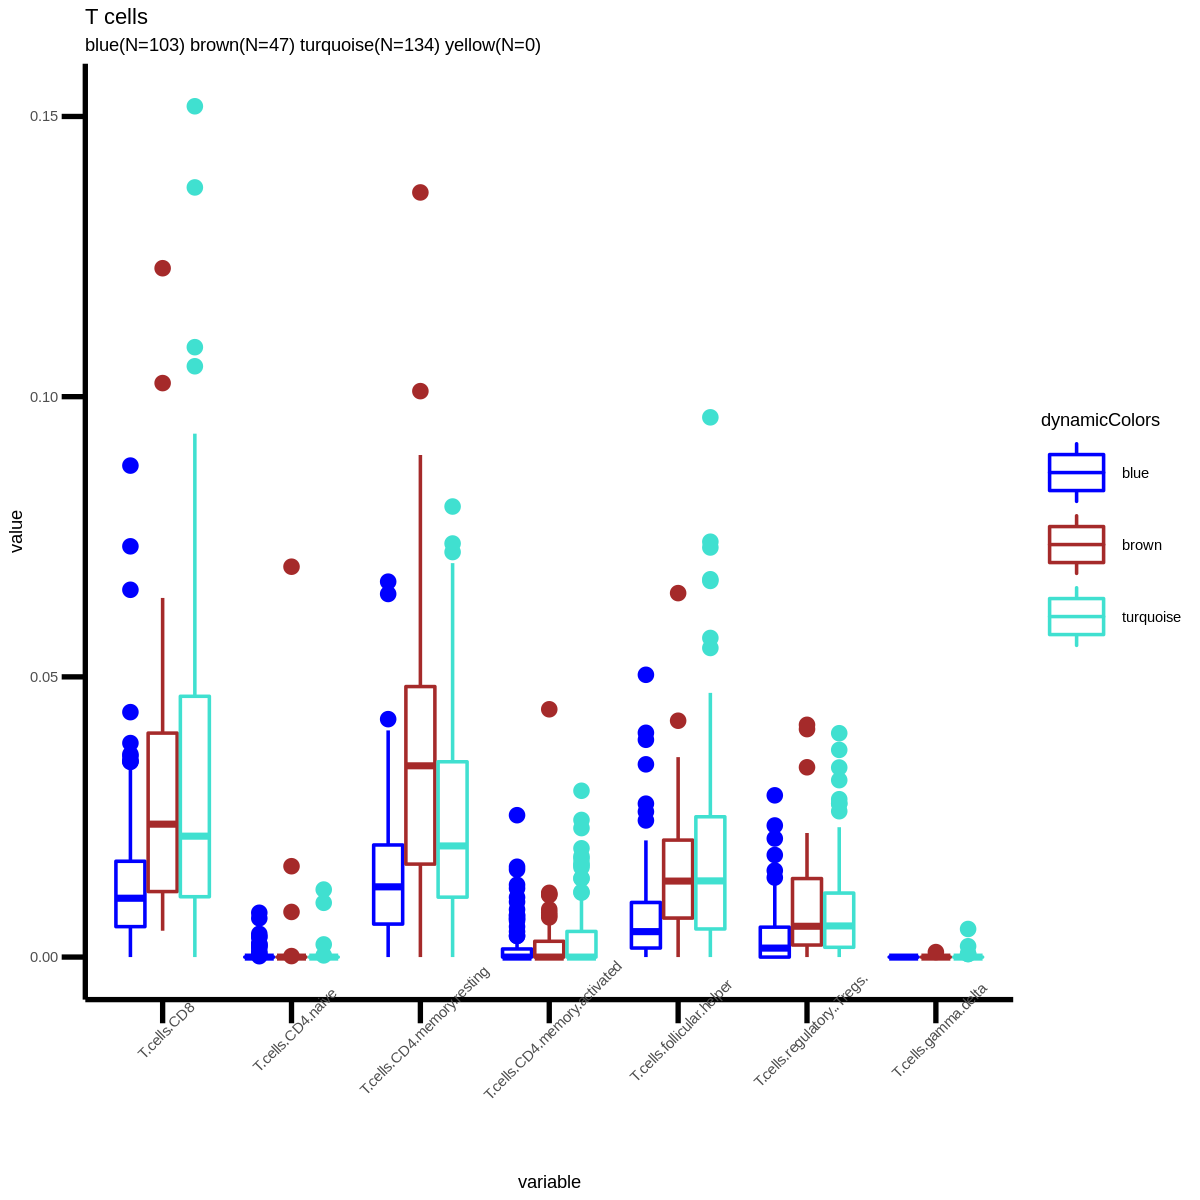

In [40]:
# # T cells
options(repr.plot.width=10, repr.plot.height=10)
colnames(MergeTable.Machine.Immune.clean)
table(MergeTable.Machine.Immune.clean$dynamicColors)
sampleSize <- paste(levels(MergeTable.Machine.Immune.clean$dynamicColors),"(N=",table(MergeTable.Machine.Immune.clean$dynamicColors),")",sep="")
sampleSize <- paste(sampleSize,collapse=" ")
dat.m.Bcell <- melt(MergeTable.Machine.Immune.clean[,c(5:11,1)],id.vars='dynamicColors')
ggplot(dat.m.Bcell) + geom_boxplot(aes(x=variable, y=value, color=dynamicColors),lwd = 1,outlier.size = 4) + 
  scale_color_manual(values= c("blue","brown","turquoise","yellow")) +
  theme_classic()+
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
        axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"),axis.text.x = element_text(angle = 45))+
  labs(title = "T cells",subtitle =sampleSize)


     blue     brown turquoise    yellow 
      103        47       134         0 

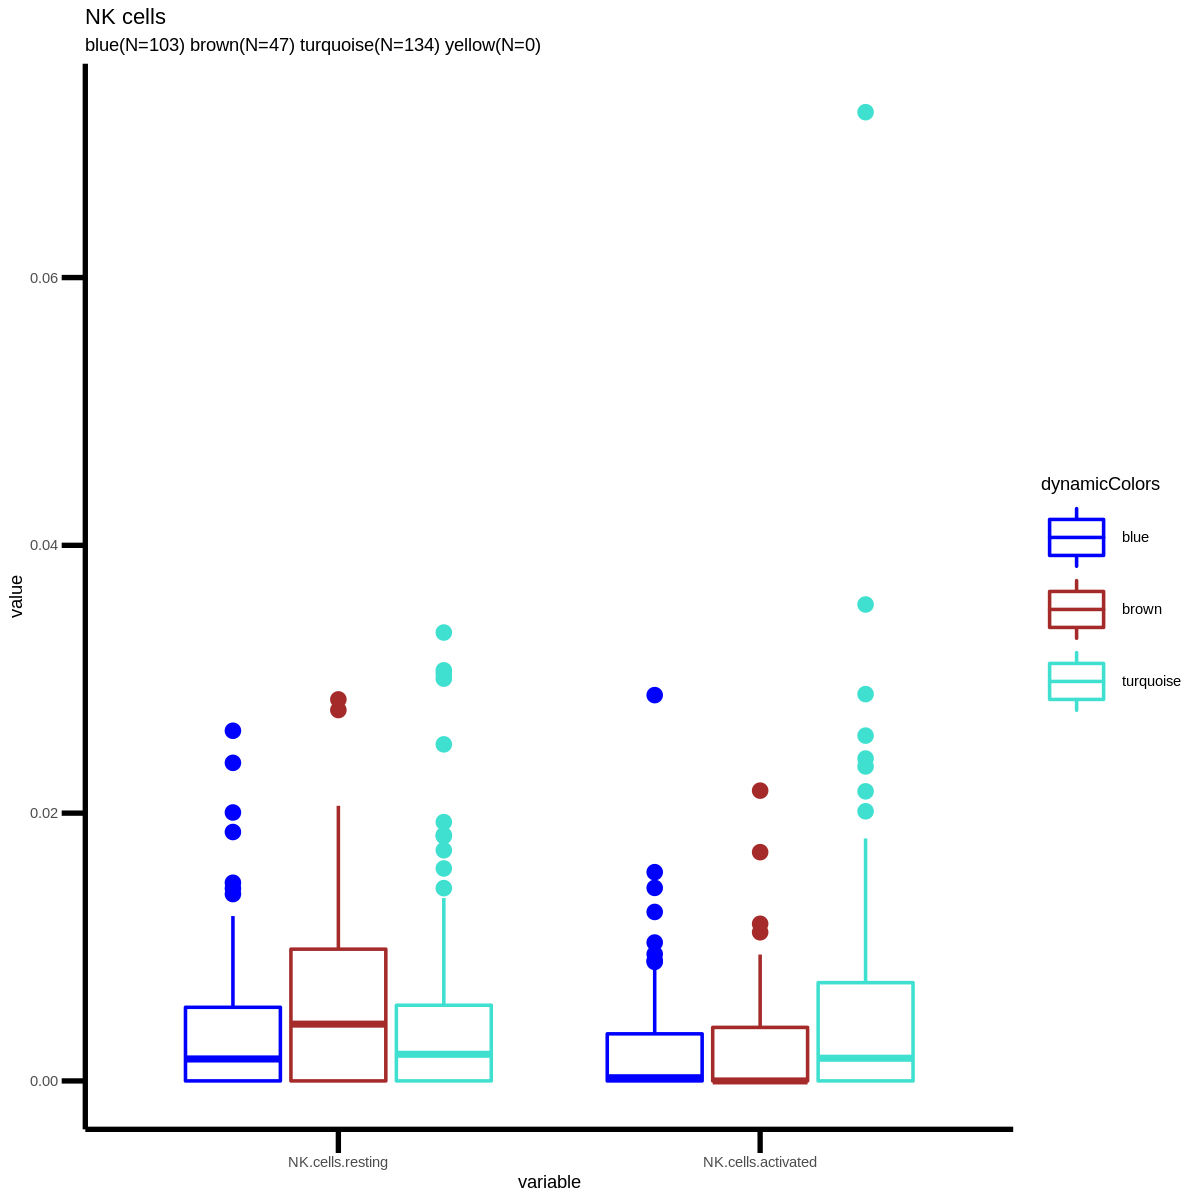

In [33]:
# # NK cells
options(repr.plot.width=10, repr.plot.height=10)
table(MergeTable.Machine.Immune.clean$dynamicColors)
sampleSize <- paste(levels(MergeTable.Machine.Immune.clean$dynamicColors),"(N=",table(MergeTable.Machine.Immune.clean$dynamicColors),")",sep="")
sampleSize <- paste(sampleSize,collapse=" ")
dat.m.Bcell <- melt(MergeTable.Machine.Immune.clean[,c(12:13,1)],id.vars='dynamicColors')
ggplot(dat.m.Bcell) + geom_boxplot(aes(x=variable, y=value, color=dynamicColors),lwd = 1,outlier.size = 4) + 
  scale_color_manual(values= c("blue","brown","turquoise","yellow")) +
  theme_classic()+
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
        axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  labs(title = "NK cells",subtitle =sampleSize)


     blue     brown turquoise    yellow 
      103        47       134         0 

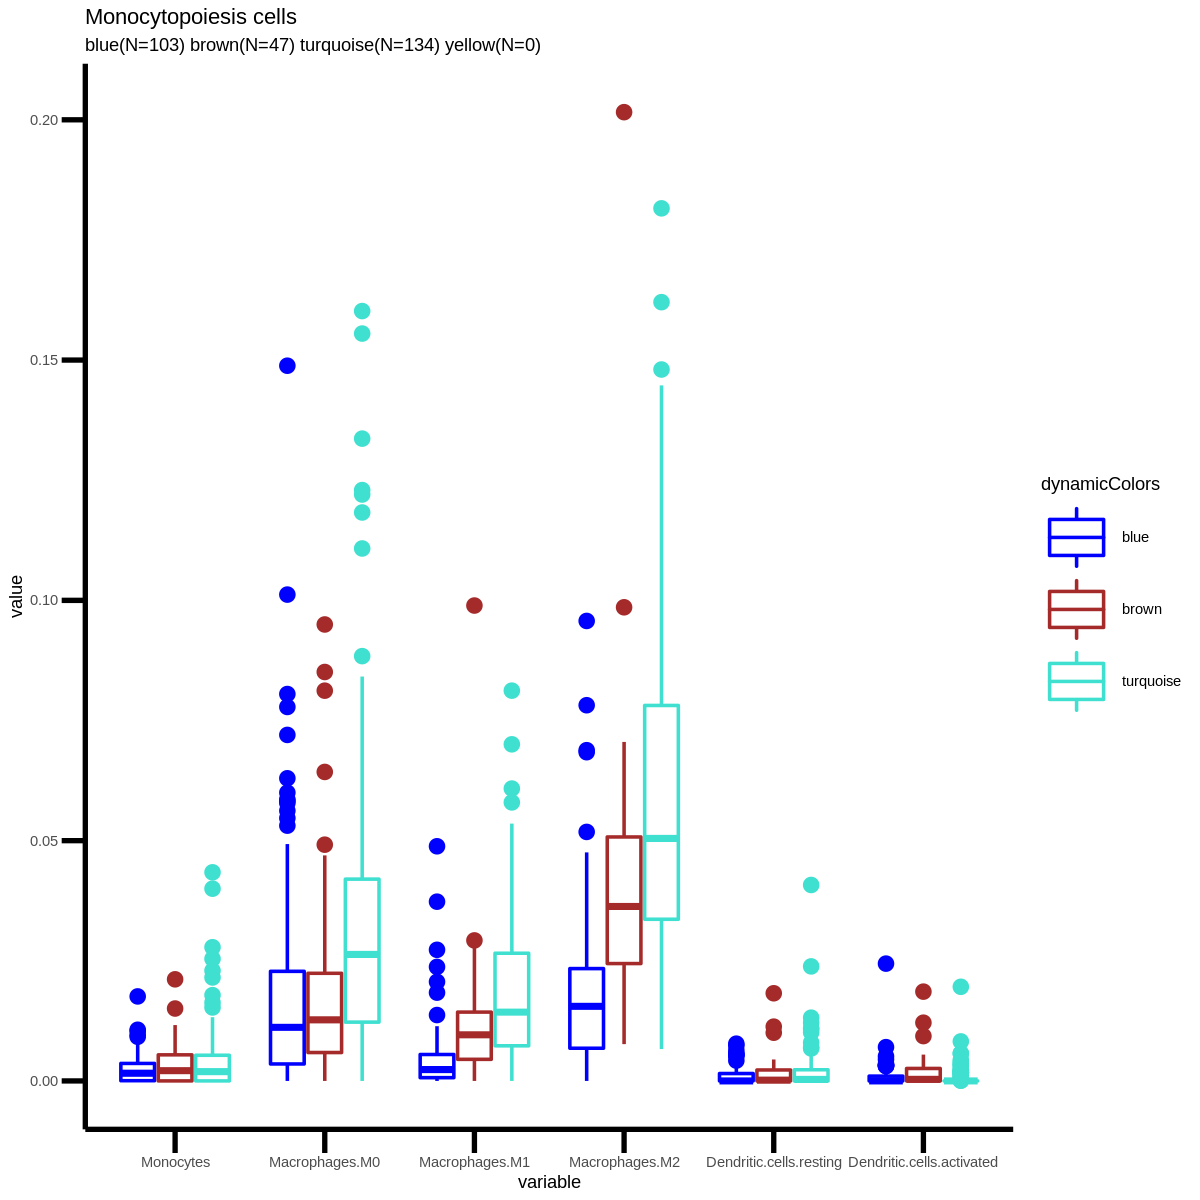

In [34]:
## Monocytopoiesis
options(repr.plot.width=10, repr.plot.height=10)
table(MergeTable.Machine.Immune.clean$dynamicColors)
sampleSize <- paste(levels(MergeTable.Machine.Immune.clean$dynamicColors),"(N=",table(MergeTable.Machine.Immune.clean$dynamicColors),")",sep="")
sampleSize <- paste(sampleSize,collapse=" ")
dat.m.Bcell <- melt(MergeTable.Machine.Immune.clean[,c(14:19,1)],id.vars='dynamicColors')
ggplot(dat.m.Bcell) + geom_boxplot(aes(x=variable, y=value, color=dynamicColors),lwd = 1,outlier.size = 4) + 
  scale_color_manual(values= c("blue","brown","turquoise","yellow")) +
  theme_classic()+
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
        axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  labs(title = "Monocytopoiesis cells",subtitle =sampleSize)



     blue     brown turquoise    yellow 
      103        47       134         0 

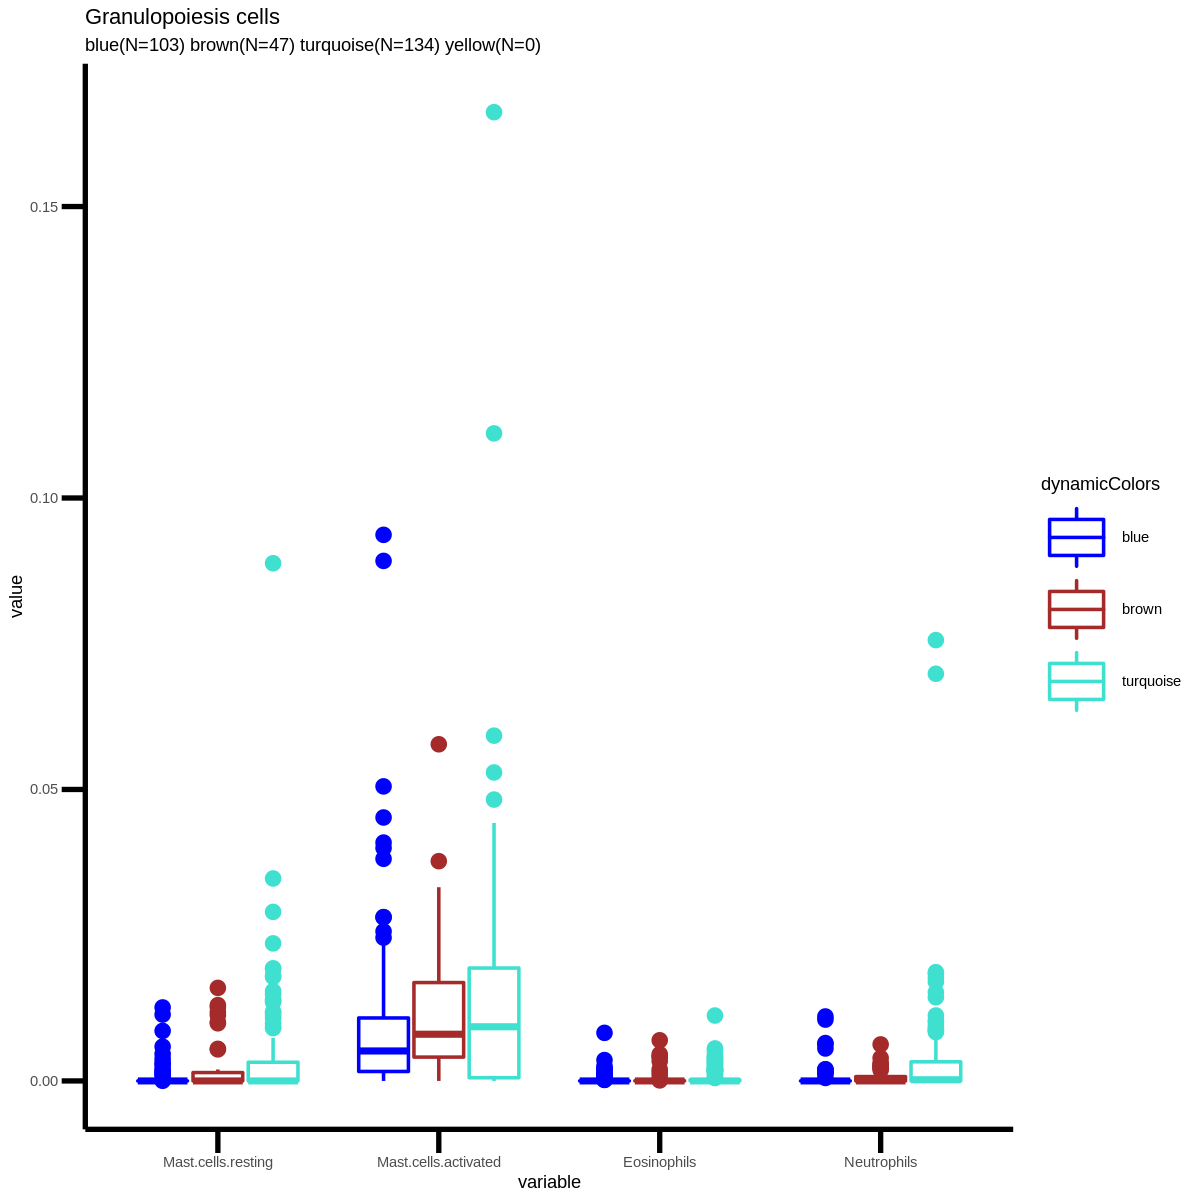

In [35]:
## Granulopoiesis
options(repr.plot.width=10, repr.plot.height=10)
table(MergeTable.Machine.Immune.clean$dynamicColors)
sampleSize <- paste(levels(MergeTable.Machine.Immune.clean$dynamicColors),"(N=",table(MergeTable.Machine.Immune.clean$dynamicColors),")",sep="")
sampleSize <- paste(sampleSize,collapse=" ")
dat.m.Bcell <- melt(MergeTable.Machine.Immune.clean[,c(20:23,1)],id.vars='dynamicColors')
ggplot(dat.m.Bcell) + geom_boxplot(aes(x=variable, y=value, color=dynamicColors),lwd = 1,outlier.size = 4) + 
  scale_color_manual(values= c("blue","brown","turquoise","yellow")) +
  theme_classic()+
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
        axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  labs(title = "Granulopoiesis cells",subtitle =sampleSize)
